# Chapter 4 다양한 분류 알고리즘

학습목표 :  
- 로지스틱 회귀, 확률적 경사 하강법과 같은 분류 알고리즘을 배움
- 이진 분류와 다중 분류의 차이를 이해하고 클래스별 확률을 예측

## 4-1 로지스틱 회귀

- 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측

### 럭키백의 확률 구하기

#### 데이터 준비하기

In [1]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
fish_target=fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

#### k-최근접 이웃 분류기의 확률 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


multiclass classification (다중분류) : 타깃 데이터에 2개 이상의 클래스가 포함된 문제

In [17]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [18]:
import numpy as np
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [19]:
distances,indexes=kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀 (logistic regression)

로지스틱 회귀는 이름은 회귀이지만 분류 모델 -> sigmoid function (logistic function) 

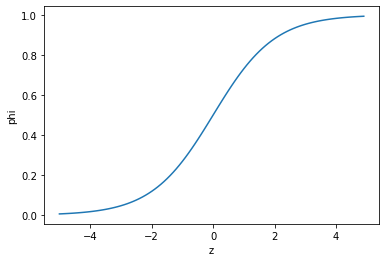

In [20]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 회귀로 이진 분류 수행하기

In [22]:
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


$z=-0.404*(Weight)-0.576*(length)-0.663*(Diagonal)-1.013*(Height)-0.732*(Width)-2.161$

-> 로지스틱 회귀모델이 학습한 방정식

In [23]:
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [24]:
#decisions 배열의 값을 확률로 변환
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


decision_function() method는 양성 클래스에 대한 z값을 반환

#### 로지스틱 회귀로 다중분류 수행하기

In [25]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [26]:
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- softmax function(소프트맥스 함수) : 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듦. 지수함수를 사용하기 때문에 정규화된 지수함수라고도 부름  
      -> 시그모이드, 소프트맥스 => 신경망에 사용

In [29]:
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [31]:
from scipy.special import softmax
proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 마무리
- `로지스틱 회귀` : 선형 방정식을 사용한 분류 알고리즘. 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력
- `다중 분류` : 타깃 클래스가 2개 이상인 분류 문제. 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측
- `시그모이드 함수` : 선형 방정식의 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용
- `소프트맥스 함수` : 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만듦